In [3]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

This database contains 76 attributes, but all published experiments
refer to using a subset of 14 of them.  In particular, the Cleveland
database is the only one that has been used by ML researchers to 
this date.  The "goal" field refers to the presence of heart disease
in the patient.  It is integer valued from 0 (no presence) to 

# Heart Disease Databases

## Introduction

### Background Infromation 
* This database contains 76 attributes, but all published experiments
  refer to using a subset of 14 of them.  In particular, the Cleveland
  database is the only one that has been used by ML researchers to 
  this date. All the attributes contain data that may be related to heart disease  

### Question 
* We will predict the 

### Dataset Description

* The Dataset we are using is the cleveland proccessed data that contains data which is already in a tidy format 
  


In [4]:
heart_disease_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"


heart_data <- read_csv(heart_disease_url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs",
                                                               "restecg", "thalach", "exang", "oldpeak", "slope",
                                                               "ca", "thal", "num")) %>% 
                        mutate(cp = as.factor(cp), fbs = as.factor(fbs), restecg = as.factor(restecg), 
                               exang = as.factor(exang), slope = as.factor(slope), sex = as.factor(sex)) %>% 
                        select(age,chol,restecg,cp ,num)
head(heart_data, 5)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



age,chol,restecg,cp,num
<dbl>,<dbl>,<fct>,<fct>,<dbl>
63,233,2,1,0
67,286,2,4,2
67,229,2,4,1
37,250,0,3,0
41,204,2,2,0


In [5]:
count_cp <- group_by(heart_data,cp) %>%
            summarize(n = n())
count_cp       

`summarise()` ungrouping output (override with `.groups` argument)



cp,n
<fct>,<int>
1,23
2,50
3,86
4,144


In [6]:
count_restecg <- group_by(heart_data,restecg) %>%
            summarize(n = n())
count_restecg       

`summarise()` ungrouping output (override with `.groups` argument)



restecg,n
<fct>,<int>
0,151
1,4
2,148


In [7]:
count_num <- group_by(heart_data,num) %>%
            summarize(n = n())
count_num       

`summarise()` ungrouping output (override with `.groups` argument)



num,n
<dbl>,<int>
0,164
1,55
2,36
3,35
4,13


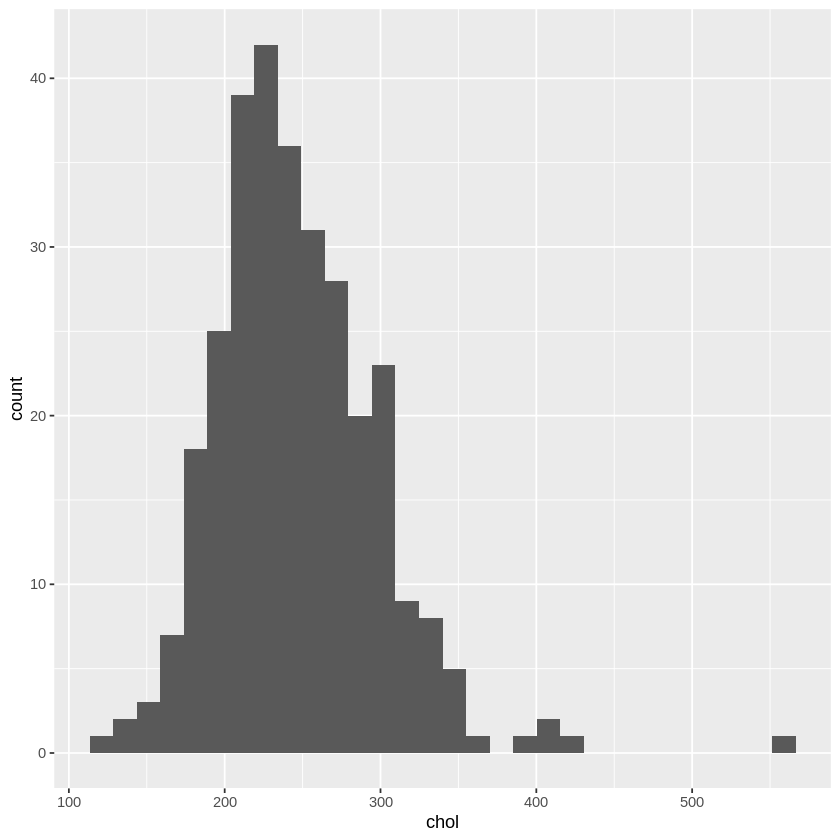

In [8]:
chol_plot <- ggplot(heart_data,  aes(x = chol)) +
    geom_histogram(bins=30)
    
chol_plot

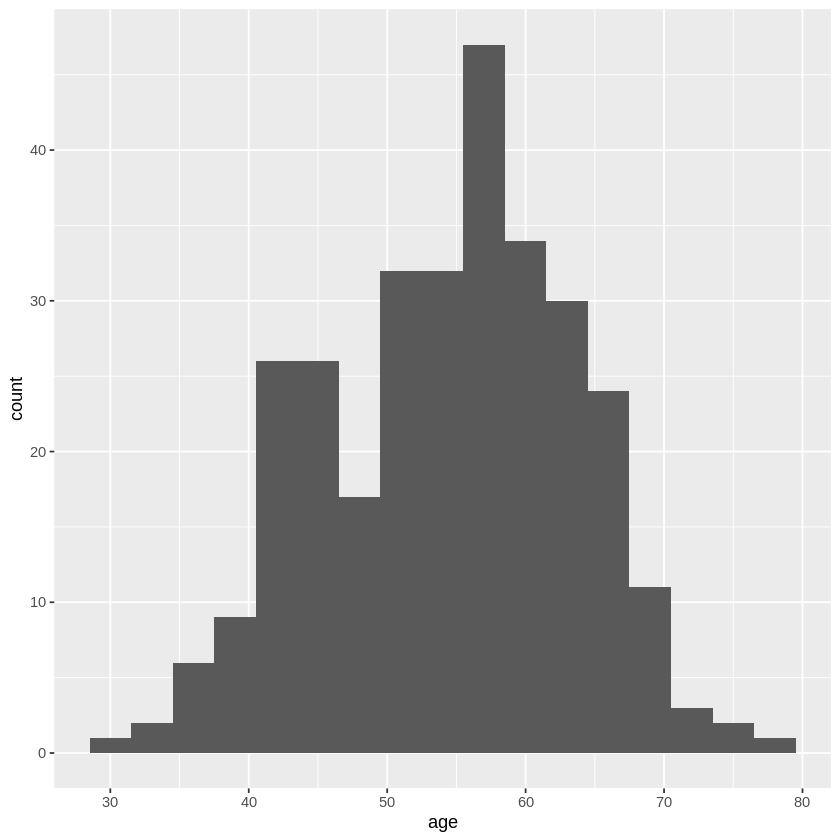

In [16]:
age_plot <- ggplot(heart_data,  aes(x = age)) +
    geom_histogram(binwidth=3)
    
age_plot

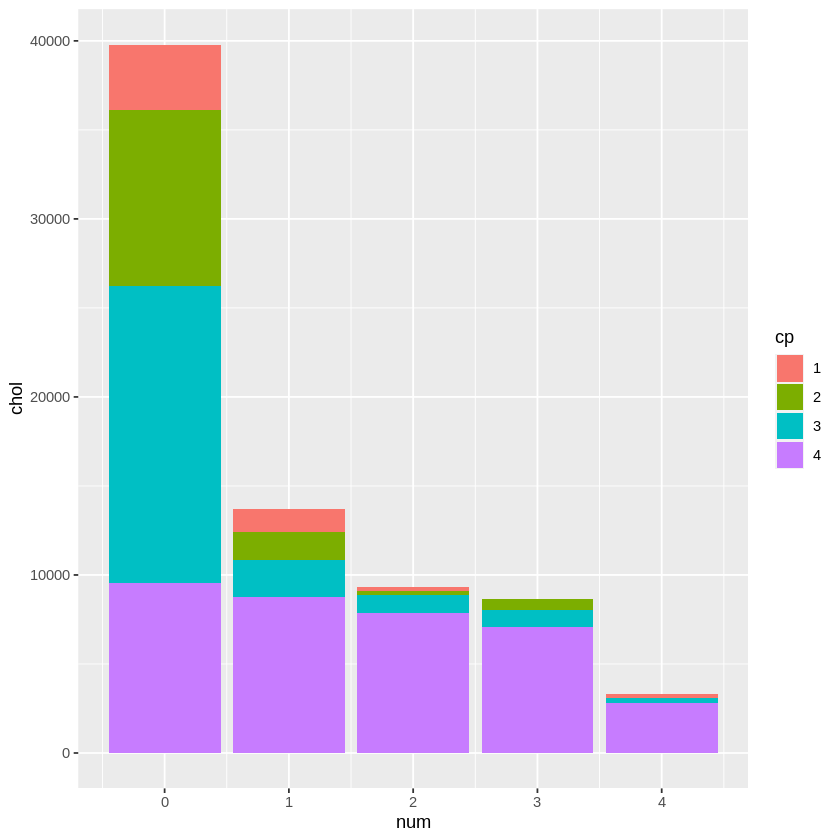

In [9]:

heart_plot <- ggplot(heart_data ,  aes(x = num , y = chol , fill = cp )) +
    geom_bar(stat="identity") 
    
    
heart_plot


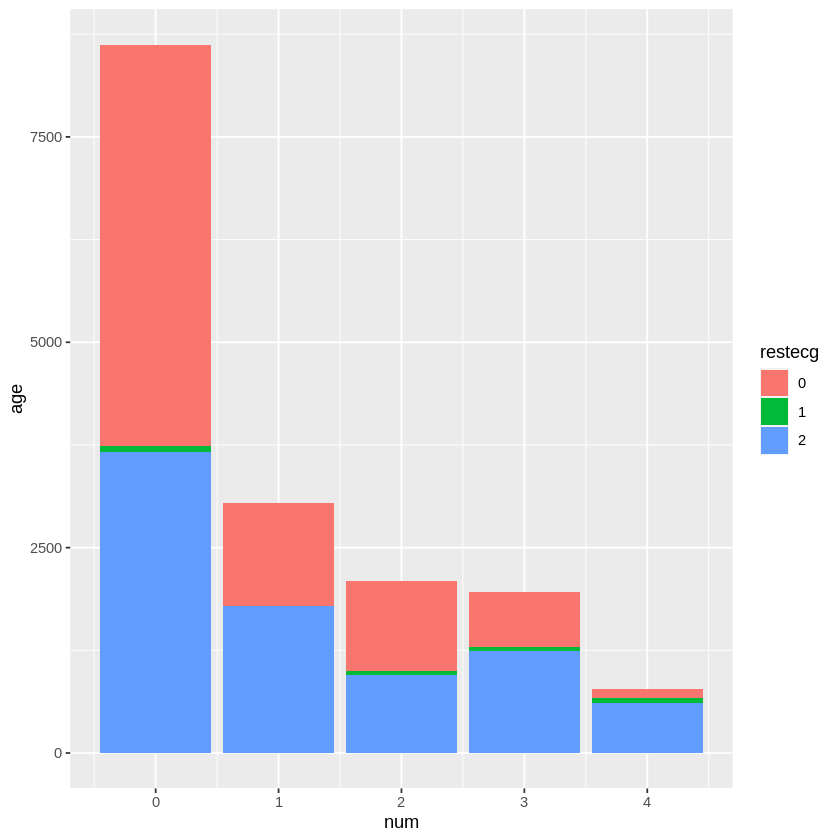

In [10]:
heart_plot2 <- ggplot(heart_data ,  aes(x = num , y = age , fill = restecg )) +
    geom_bar(stat="identity") 
heart_plot2